=== InGaN/GaN Ridge Waveguide Parameters ===
Wavelength: 0.45 μm (450 nm)
InGaN refractive index: 2.55
GaN refractive index: 2.5
AlGaN cladding index: 2.4
Ridge width: 2.0 μm
Ridge height: 0.5 μm
Active layer thickness: 0.1 μm
Slab thickness: 0.3 μm

=== Plotting Refractive Index Distribution ===


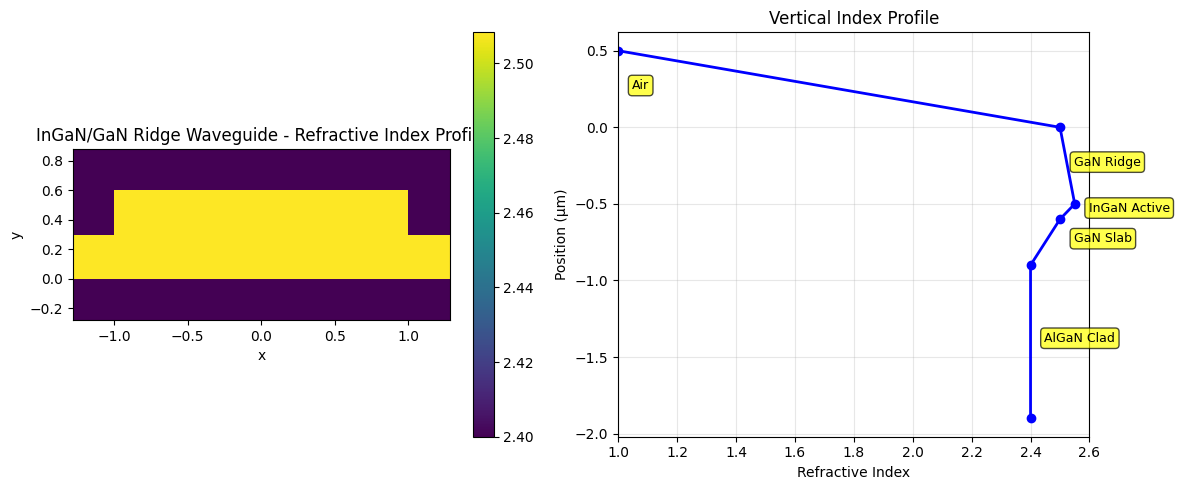

06:48:22 UTC WARNING: The group index was not computed. To calculate group      
             index, pass 'group_index_step = True' in the 'ModeSpec'.           

2025-08-01 06:48:22.692 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into /home/vscode/.gdsfactory/modes/Waveguide_efca8ffae574cde4.npz.


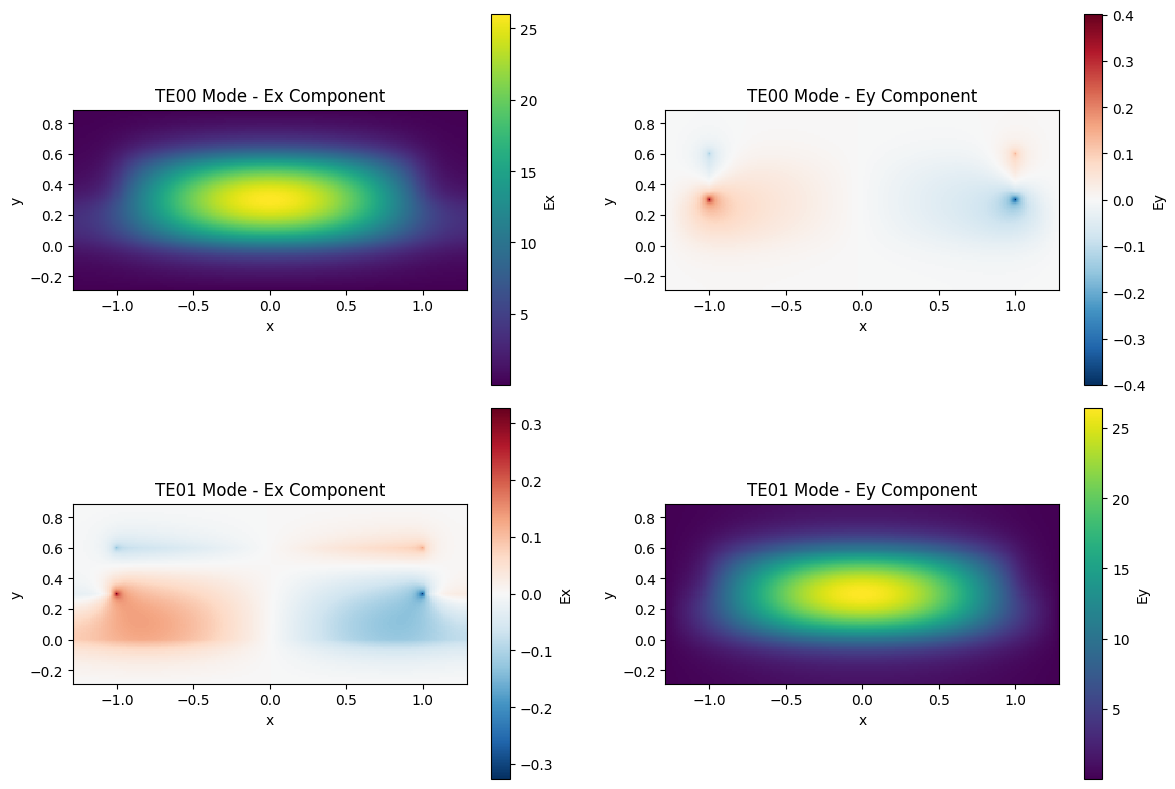


=== Mode Properties ===
Mode properties access error: unsupported format string passed to numpy.ndarray.__format__

=== Additional Analysis Parameters ===
Numerical Aperture (approx): 0.862
V-parameter (ridge width): 24.06
Cut-off width for single mode: 0.20 μm

=== Design Guidelines ===
- For single mode operation, consider reducing ridge width
- InGaN composition affects both gain and refractive index
- Ridge etching depth affects lateral confinement
- Consider thermal effects in high-power operation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gplugins.tidy3d as gt

# 材料の屈折率定義 (450nm近辺での値)
# InGaN: 組成によって変わるが、In組成20%程度を想定
# GaN: 2.5程度
# AlGaN: Al組成によって変わるが、クラッド層として2.4程度
# 空気: 1.0

# 波長設定 (青色レーザー想定)
wavelength = 0.45  # 450nm

# InGaN/GaN リッジ導波路の構造パラメータ
class InGaNGaNRidgeWaveguide:
    def __init__(self):
        self.wavelength = wavelength
        
        # 材料屈折率
        self.n_ingan = 2.55    # InGaN活性層 (In組成～20%)
        self.n_gan = 2.50      # GaN装荷層
        self.n_algan = 2.40    # AlGaNクラッド層
        self.n_air = 1.0       # 空気
        
        # 構造寸法 (μm)
        self.ridge_width = 2.0        # リッジ幅
        self.ridge_height = 0.5       # リッジ高さ
        self.core_thickness = 0.1     # InGaN活性層厚さ
        self.slab_thickness = 0.3     # 下部GaN層厚さ
        self.clad_thickness = 1.0     # AlGaNクラッド層厚さ
        
    def create_waveguide_structure(self):
        """リッジ導波路構造を作成"""
        # 基本的なスラブ導波路として近似
        # コア: InGaN活性層 + GaN装荷層の実効屈折率
        # 実効屈折率を重み付き平均で計算
        effective_core_n = (self.n_ingan * self.core_thickness + 
                           self.n_gan * self.ridge_height) / (self.core_thickness + self.ridge_height)
        
        waveguide = gt.modes.Waveguide(
            wavelength=self.wavelength,
            core_width=self.ridge_width,
            core_thickness=self.core_thickness + self.ridge_height,
            slab_thickness=self.slab_thickness,
            core_material=effective_core_n,
            clad_material=self.n_algan,
        )
        return waveguide
    
    def create_detailed_structure(self):
        """より詳細なリッジ構造をtidy3dで直接定義"""
        # この部分は実際のtidy3dの詳細な構造定義に対応
        # ここではsimplified版として基本構造を返す
        return self.create_waveguide_structure()

# インスタンス作成と計算
ridge_wg = InGaNGaNRidgeWaveguide()
waveguide = ridge_wg.create_waveguide_structure()

print("=== InGaN/GaN Ridge Waveguide Parameters ===")
print(f"Wavelength: {ridge_wg.wavelength} μm ({ridge_wg.wavelength*1000:.0f} nm)")
print(f"InGaN refractive index: {ridge_wg.n_ingan}")
print(f"GaN refractive index: {ridge_wg.n_gan}")
print(f"AlGaN cladding index: {ridge_wg.n_algan}")
print(f"Ridge width: {ridge_wg.ridge_width} μm")
print(f"Ridge height: {ridge_wg.ridge_height} μm")
print(f"Active layer thickness: {ridge_wg.core_thickness} μm")
print(f"Slab thickness: {ridge_wg.slab_thickness} μm")

# 屈折率分布をプロット
print("\n=== Plotting Refractive Index Distribution ===")
plt.figure(figsize=(12, 5))

# 左側：縦方向（厚さ方向）の屈折率分布
plt.subplot(1, 2, 1)
waveguide.plot_index()
plt.title("InGaN/GaN Ridge Waveguide - Refractive Index Profile")

# 右側：詳細な屈折率分布（手動作成）
plt.subplot(1, 2, 2)

# 構造の座標定義
y_positions = np.array([
    -ridge_wg.clad_thickness - ridge_wg.slab_thickness - ridge_wg.core_thickness - ridge_wg.ridge_height,
    -ridge_wg.slab_thickness - ridge_wg.core_thickness - ridge_wg.ridge_height,
    -ridge_wg.core_thickness - ridge_wg.ridge_height,
    -ridge_wg.ridge_height,
    0,
    0.5
])

n_profile = np.array([
    ridge_wg.n_algan,  # 下部クラッド
    ridge_wg.n_algan,  # 下部クラッド
    ridge_wg.n_gan,    # 下部GaN層
    ridge_wg.n_ingan,  # InGaN活性層
    ridge_wg.n_gan,    # GaN装荷層（リッジ部）
    ridge_wg.n_air     # 空気
])

plt.plot(n_profile, y_positions, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Refractive Index')
plt.ylabel('Position (μm)')
plt.title('Vertical Index Profile')
plt.grid(True, alpha=0.3)

# 各層にラベルを追加
layer_labels = ['Air', 'GaN Ridge', 'InGaN Active', 'GaN Slab', 'AlGaN Clad']
layer_y_pos = [0.25, -ridge_wg.ridge_height/2, 
               -ridge_wg.ridge_height - ridge_wg.core_thickness/2,
               -ridge_wg.ridge_height - ridge_wg.core_thickness - ridge_wg.slab_thickness/2,
               -ridge_wg.ridge_height - ridge_wg.core_thickness - ridge_wg.slab_thickness - ridge_wg.clad_thickness/2]

for i, (label, y_pos) in enumerate(zip(layer_labels, layer_y_pos)):
    plt.annotate(label, xy=(n_profile[-(i+1)], y_pos), xytext=(10, 0), 
                textcoords='offset points', fontsize=9, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.xlim(1.0, 2.6)
plt.tight_layout()
plt.show()

# モード解析
# 基本TEモード (TE00)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
waveguide.plot_field(field_name="Ex", mode_index=0)
plt.title("TE00 Mode - Ex Component")

plt.subplot(2, 2, 2)
waveguide.plot_field(field_name="Ey", mode_index=0)
plt.title("TE00 Mode - Ey Component")

# 高次TEモード (TE01) - 存在する場合
try:
    plt.subplot(2, 2, 3)
    waveguide.plot_field(field_name="Ex", mode_index=1)
    plt.title("TE01 Mode - Ex Component")
    
    plt.subplot(2, 2, 4)
    waveguide.plot_field(field_name="Ey", mode_index=1)
    plt.title("TE01 Mode - Ey Component")
except:
    print("Higher order modes not supported or not found")

plt.tight_layout()
plt.show()

# モード特性の取得と表示
try:
    neff = waveguide.n_eff
    print(f"\n=== Mode Properties ===")
    print(f"Effective refractive index: {neff:.4f}")
    
    # 損失や閉じ込め因子なども取得可能な場合
    if hasattr(waveguide, 'loss'):
        print(f"Loss: {waveguide.loss:.4f} dB/cm")
    if hasattr(waveguide, 'confinement_factor'):
        print(f"Confinement factor: {waveguide.confinement_factor:.4f}")
        
except Exception as e:
    print(f"Mode properties access error: {e}")

# より詳細な解析のための追加パラメータ
print(f"\n=== Additional Analysis Parameters ===")
print(f"Numerical Aperture (approx): {np.sqrt(ridge_wg.n_ingan**2 - ridge_wg.n_algan**2):.3f}")
print(f"V-parameter (ridge width): {2*np.pi*ridge_wg.ridge_width*np.sqrt(ridge_wg.n_ingan**2 - ridge_wg.n_algan**2)/ridge_wg.wavelength:.2f}")
print(f"Cut-off width for single mode: {ridge_wg.wavelength*2.405/(2*np.pi*np.sqrt(ridge_wg.n_ingan**2 - ridge_wg.n_algan**2)):.2f} μm")

# 実用的な設計指針
print(f"\n=== Design Guidelines ===")
print("- For single mode operation, consider reducing ridge width")
print("- InGaN composition affects both gain and refractive index")
print("- Ridge etching depth affects lateral confinement")
print("- Consider thermal effects in high-power operation")